In [251]:
# from google.colab import files
# uploaded = files.upload()
# content = 'crop_yield.csv'

In [252]:
import numpy as np
import pandas as pd
import time

In [253]:
from google.colab import drive

drive.mount('/content/drive')
# content = '/content/drive/My Drive/Colab Notebooks/Data/crop_yield.csv' # Indian data-set
content = '/content/drive/My Drive/Colab Notebooks/Data/data_crop_yield.csv'  #  USA data-set

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [254]:
df = pd.read_csv(content)
df

,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800
...,...,...,...,...,...,...
151,"Rubber, natural",2308.51,18.27,83.65,26.47,6721
152,"Rubber, natural",2410.13,18.58,83.45,26.81,6248
153,"Rubber, natural",2967.41,18.67,85.48,26.46,6842
154,"Rubber, natural",2333.46,18.50,84.85,26.43,5571


# **USA Data-set encoding**

In [255]:
# # One-hot encoding
# df_encoded = pd.get_dummies(df, columns=['Crop'])

# Mean encoding
df_encoded = df.copy()
crop_mean_yield = df_encoded.groupby('Crop')['Yield'].mean()
df_encoded['Crop'] = df_encoded['Crop'].map(crop_mean_yield)

# **Indian Data-set encoding**

In [256]:
# # One-hot encoding
# df_encoded = pd.get_dummies(df, columns=['Crop', 'Season', 'State'])

# # Mean encoding
# df_encoded = df.copy()
# crop_mean_yield = df_encoded.groupby('Crop')['Yield'].mean()
# season_mean_yield = df_encoded.groupby('Season')['Yield'].mean()
# state_mean_yield = df_encoded.groupby('State')['Yield'].mean()
# df_encoded['Crop'] = df_encoded['Crop'].map(crop_mean_yield)
# df_encoded['Season'] = df_encoded['Season'].map(season_mean_yield)
# df_encoded['State'] = df_encoded['State'].map(state_mean_yield)

# # Target encoding
# df_encoded = df.copy()
# df_encoded['Crop'] = df_encoded.groupby('Crop')['Yield'].transform('mean')
# df_encoded['Season'] = df_encoded.groupby('Season')['Yield'].transform('mean')
# df_encoded['State'] = df_encoded.groupby('State')['Yield'].transform('mean')

# # Label Encoding
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# df_encoded = df.copy()
# df_encoded['Crop'] = label_encoder.fit_transform(df_encoded['Crop'])
# df_encoded['Season'] = label_encoder.fit_transform(df_encoded['Season'])
# df_encoded['State'] = label_encoder.fit_transform(df_encoded['State'])

# # Feature Hashing
# import hashlib
# def hash_string_to_int(s, num_buckets):
#     return int(hashlib.md5(s.encode()).hexdigest(), 16) % num_buckets
# num_buckets = 10
# df_encoded = df.copy()
# df_encoded['Crop'] = df_encoded['Crop'].apply(lambda x: hash_string_to_int(x, num_buckets))
# df_encoded['Season'] = df_encoded['Season'].apply(lambda x: hash_string_to_int(x, num_buckets))
# df_encoded['State'] = df_encoded['State'].apply(lambda x: hash_string_to_int(x, num_buckets))

# **Display data_set**

In [257]:
df_encoded

,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,8883.128205,2248.92,17.72,83.40,26.01,11560
1,8883.128205,1938.42,17.54,82.11,26.11,11253
2,8883.128205,2301.54,17.81,82.79,26.24,9456
3,8883.128205,2592.35,17.61,85.07,25.56,9321
4,8883.128205,2344.72,17.61,84.12,25.76,8800
...,...,...,...,...,...,...
151,7824.897436,2308.51,18.27,83.65,26.47,6721
152,7824.897436,2410.13,18.58,83.45,26.81,6248
153,7824.897436,2967.41,18.67,85.48,26.46,6842
154,7824.897436,2333.46,18.50,84.85,26.43,5571


# **Mapped value for using Mean encoding**

In [258]:
# crop_mean_yield
# season_mean_yield
# state_mean_yield

# **Check for null value**

In [259]:
df_encoded.isnull().sum()

,0
Crop,0
Precipitation (mm day-1),0
Specific Humidity at 2 Meters (g/kg),0
Relative Humidity at 2 Meters (%),0
Temperature at 2 Meters (C),0
Yield,0


# **Independent variable**

In [260]:
X = df_encoded.drop(columns=['Yield'])
X

,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C)
0,8883.128205,2248.92,17.72,83.40,26.01
1,8883.128205,1938.42,17.54,82.11,26.11
2,8883.128205,2301.54,17.81,82.79,26.24
3,8883.128205,2592.35,17.61,85.07,25.56
4,8883.128205,2344.72,17.61,84.12,25.76
...,...,...,...,...,...
151,7824.897436,2308.51,18.27,83.65,26.47
152,7824.897436,2410.13,18.58,83.45,26.81
153,7824.897436,2967.41,18.67,85.48,26.46
154,7824.897436,2333.46,18.50,84.85,26.43


# **Dependent variable**

In [261]:
y = df_encoded['Yield']
y

,Yield
0,11560
1,11253
2,9456
3,9321
4,8800
...,...
151,6721
152,6248
153,6842
154,5571


# **Train test seperation**

In [262]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# **Assign linear model from sklearn**

In [263]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# **Train model**

In [264]:
start_time = time.time()
lr.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print("Training time:", training_time, "seconds")

Training time: 0.007853507995605469 seconds


# **Predict the training model**

In [265]:
y_pred_train = lr.predict(X_train)
# y_pred_train

# **Predict test model**

In [266]:
y_pred_test = lr.predict(X_test)
# y_pred_test

# **Mean square error**

In [267]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(rmse)

9129.537846466765


# **Model accuracy while training**

In [268]:
from sklearn.metrics import mean_squared_error
training_accuracy = lr.score(X_train, y_train)
training_accuracy

0.9894465713350746

# **Model accuracy while testing**

In [269]:
from sklearn.metrics import r2_score
testing_accuracy = r2_score(y_test, y_pred_test)
testing_accuracy

0.9845538088670265

# **Y-intercept**

In [270]:
y_intercept = lr.intercept_
y_intercept

1301042.014413915

# **Feature coefficients**

In [271]:
coefficients = lr.coef_
coefficients

array([ 1.00178996e+00,  7.54746803e+00,  4.11272751e+04, -1.13443225e+04,
       -4.22811595e+04])

# **Important stuff**

In [295]:
print(f"Y-intercept (coefficient):\n\ttheta 0 --> {y_intercept} constant_value")
print("\nTheta (coefficients) for Features (independent variable):")

feature_names = X.columns
count = 1
for coefficient, feature in zip(coefficients, feature_names):
    print(f"\ttheta {count} --> {round(coefficient, 10)} for {feature}")
    count += 1
print(f"\nRoot Mean Squared Error (RMSE):\n\t{rmse}")
print(f"\nModel accuracy in training:\n\t{training_accuracy} or {round((training_accuracy*100), 2)}%")
print(f"\nModel accuracy in testing:\n\t{testing_accuracy} or {round((testing_accuracy*100), 2)}%")
print(f"\nTraining time:\n\t{round(training_time, 16)}ms")

Y-intercept (coefficient):
	theta 0 --> 1301042.014413915 constant_value

Theta (coefficients) for Features (independent variable):
	theta 1 --> 1.001789959 for Crop
	theta 2 --> 7.547468025 for Precipitation (mm day-1)
	theta 3 --> 41127.2751255203 for Specific Humidity at 2 Meters (g/kg)
	theta 4 --> -11344.322482514 for Relative Humidity at 2 Meters (%)
	theta 5 --> -42281.1594986032 for Temperature at 2 Meters (C)

Root Mean Squared Error (RMSE):
	9129.537846466765

Model accuracy in training:
	0.9894465713350746 or 98.94%

Model accuracy in testing:
	0.9845538088670265 or 98.46%

Training time:
	0.0078535079956055ms


# **Total contribution of individual features out of 100%**

In [273]:
abs_coefficients = np.abs(coefficients)
total_contribution = np.sum(abs_coefficients)
percentage_contributions = (abs_coefficients / total_contribution) * 100

feature_contributions = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Contribution (%)': percentage_contributions
})

print(feature_contributions, "\n")
print("Total contribution", total_contribution)

                                Feature   Coefficient  Contribution (%)
0                                  Crop      1.001790          0.001057
1              Precipitation (mm day-1)      7.547468          0.007965
2  Specific Humidity at 2 Meters (g/kg)  41127.275126         43.400916
3     Relative Humidity at 2 Meters (%) -11344.322483         11.971471
4           Temperature at 2 Meters (C) -42281.159499         44.618591 

Total contribution 94761.3063646215


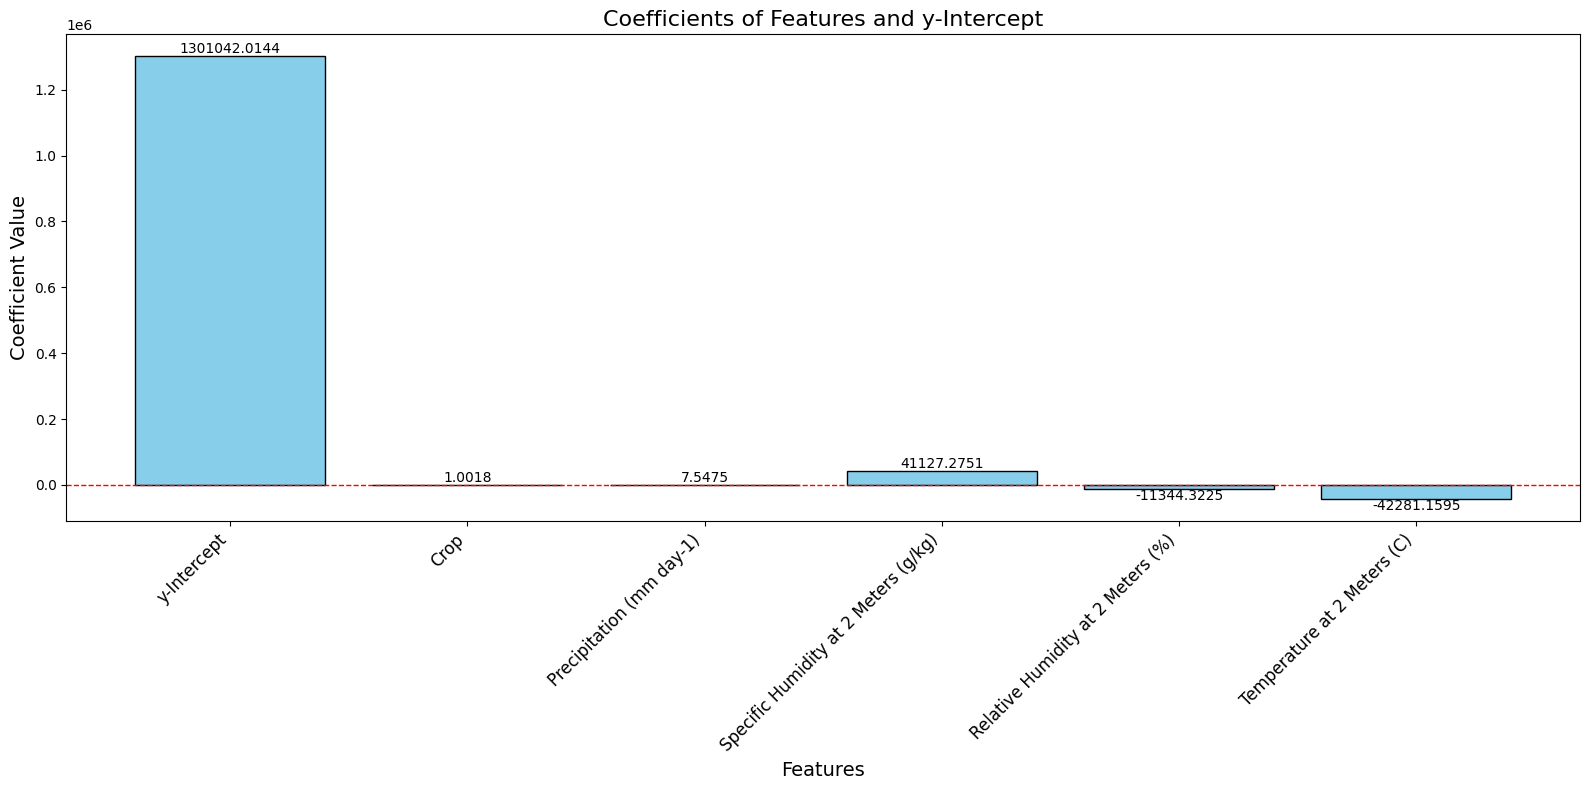

In [274]:
import matplotlib.pyplot as plt

# Combine y-intercept and coefficients
coefficients_with_intercept = [y_intercept] + list(coefficients)  # Include y-intercept as the first element

# Plot
plt.figure(figsize=(16, 8))
features = X.columns
bars = plt.bar(["y-Intercept"] + list(features), coefficients_with_intercept, color='skyblue', edgecolor='black')  # Add "y-Intercept"
plt.axhline(0, color='red', linestyle='--', linewidth=1)

# Annotate each bar with the coefficient value
for bar, value in zip(bars, coefficients_with_intercept):
    height = bar.get_height()
    y_offset = 0.1 if height >= 0 else -0.1  # Adjust label position
    plt.text(bar.get_x() + bar.get_width() / 2, height + y_offset, f"{value:.4f}",
             ha='center', va='bottom' if height >= 0 else 'top', fontsize=10, color='black')

# Add titles and labels
plt.title("Coefficients of Features and y-Intercept", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Coefficient Value", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.tight_layout()

plt.show()

# **Contribution graph**

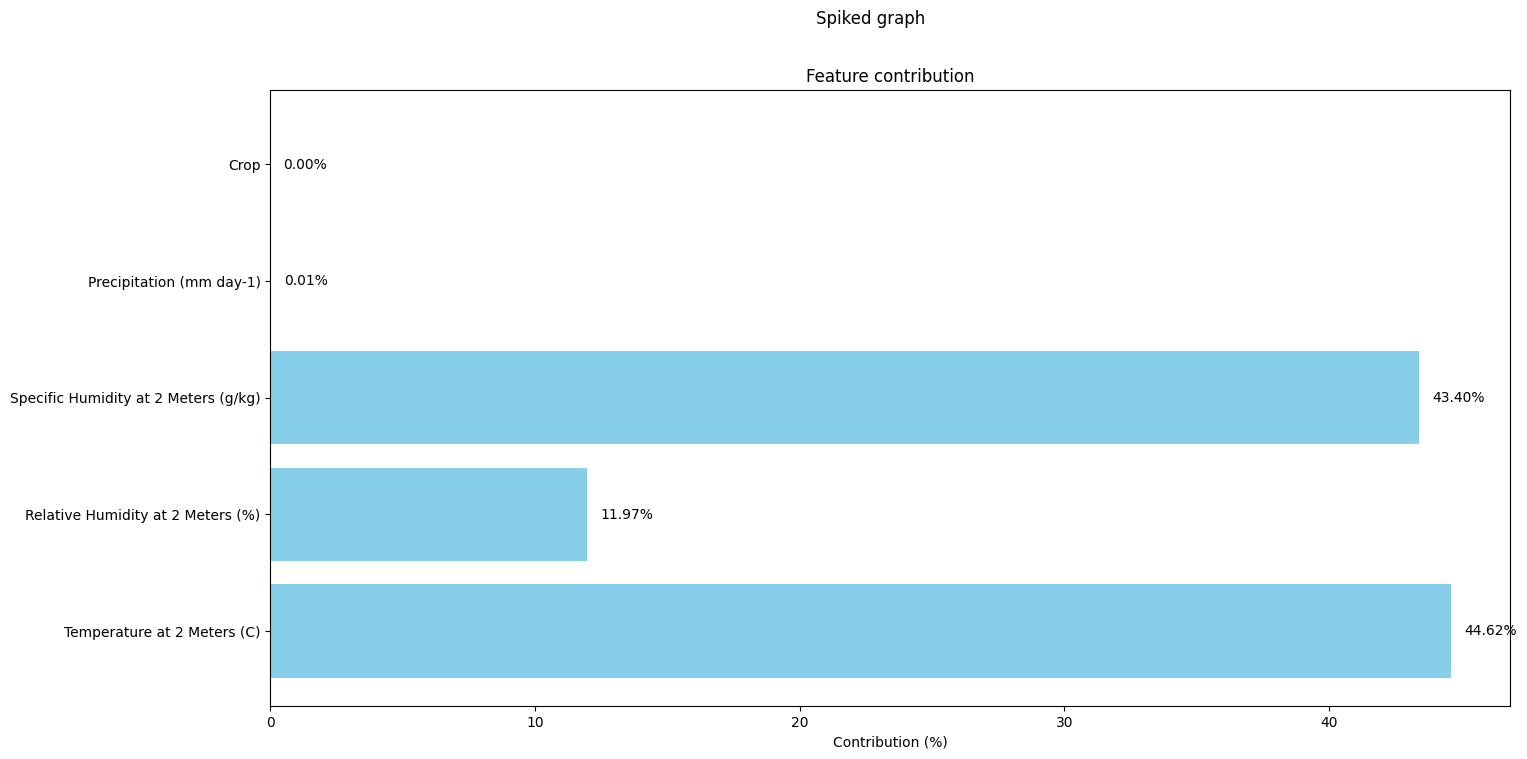

In [275]:
plt.figure(figsize=(16, 8))
bars = plt.barh(feature_contributions['Feature'], feature_contributions['Contribution (%)'], color='skyblue')
plt.suptitle('Spiked graph')
plt.title('Feature contribution')
plt.xlabel('Contribution (%)')
plt.gca().invert_yaxis()

for bar, percentage in zip(bars, percentage_contributions):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
             f'{percentage:.2f}%', va='center')

plt.show()

# **Scatter plot graph**

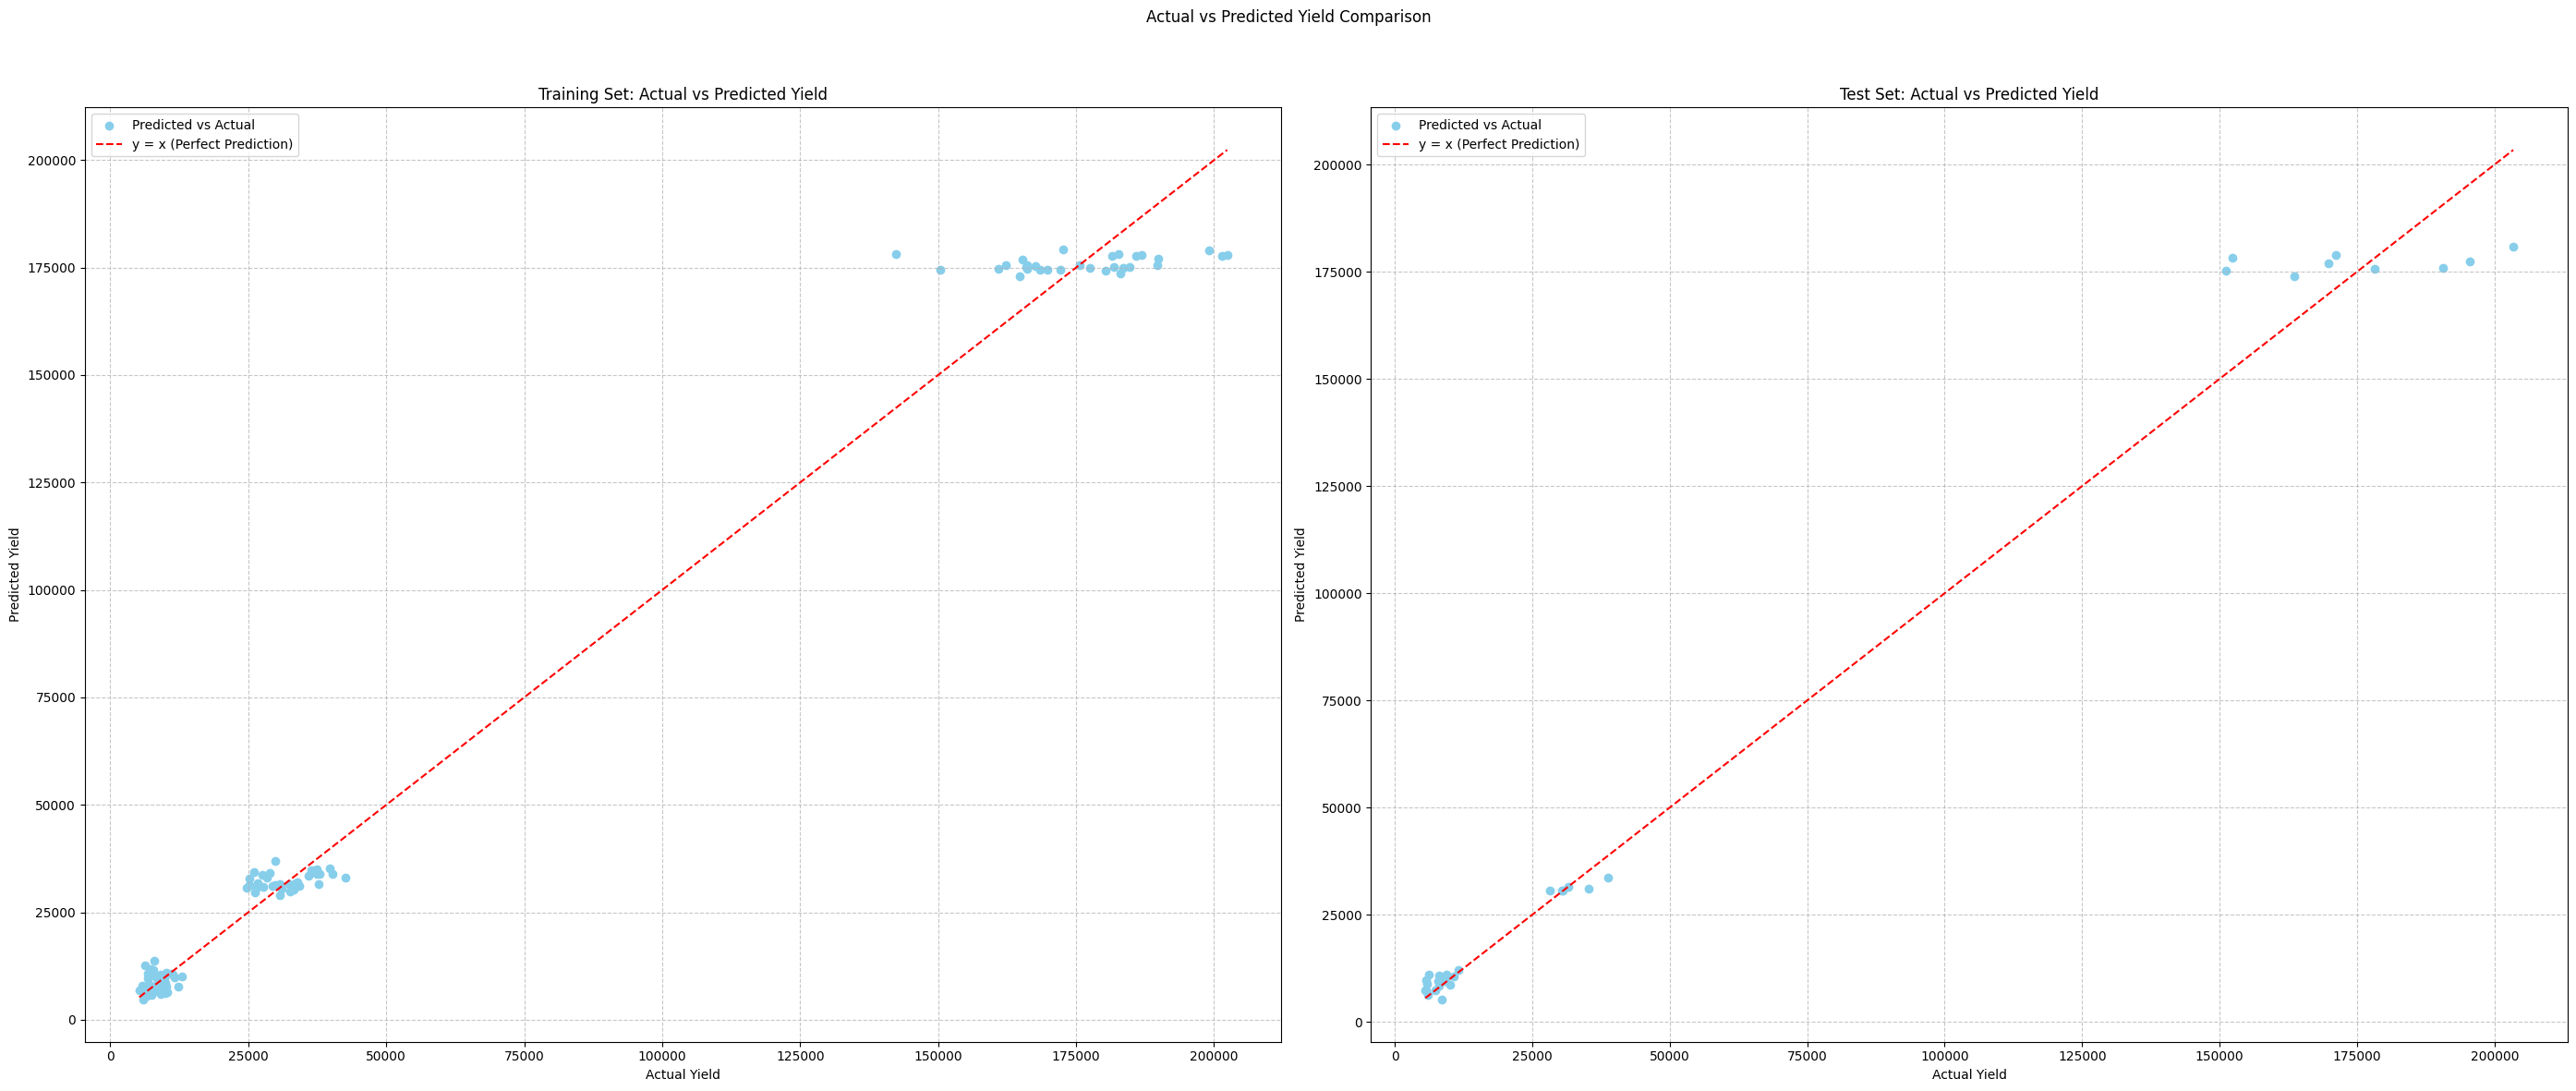

In [276]:
import matplotlib.pyplot as plt

plt.figure(figsize=(28, 12))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, color="skyblue", label="Predicted vs Actual")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color="red", linestyle="--", label="y = x (Perfect Prediction)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.title('Training Set: Actual vs Predicted Yield')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, color="skyblue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="y = x (Perfect Prediction)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.title('Test Set: Actual vs Predicted Yield')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.legend()

plt.suptitle('Actual vs Predicted Yield Comparison')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# **Actual vs prediction chart**

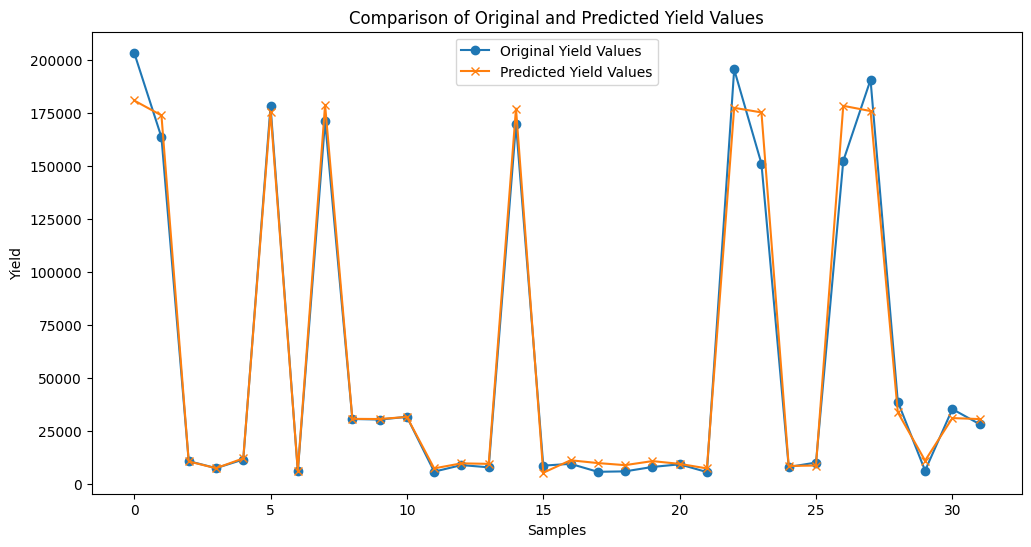

In [277]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Original Yield Values', marker='o')
plt.plot(y_pred_test, label='Predicted Yield Values', marker='x')
plt.title('Comparison of Original and Predicted Yield Values')
plt.xlabel('Samples')
plt.ylabel('Yield')
plt.legend()
plt.show()

# **Actual vs prediction table**

In [278]:
print("Actual vs Predicted Yield Values:")
for actual, predicted in zip(y_test, y_pred_test):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")

Actual vs Predicted Yield Values:
Actual: 203399.00, Predicted: 180863.27
Actual: 163541.00, Predicted: 173841.24
Actual: 10737.00, Predicted: 10577.60
Actual: 7435.00, Predicted: 7395.21
Actual: 11487.00, Predicted: 12034.60
Actual: 178183.00, Predicted: 175662.33
Actual: 6077.00, Predicted: 6276.49
Actual: 171189.00, Predicted: 178795.22
Actual: 30614.00, Predicted: 30680.29
Actual: 30348.00, Predicted: 30594.71
Actual: 31619.00, Predicted: 31583.23
Actual: 5765.00, Predicted: 7313.82
Actual: 8865.00, Predicted: 9684.76
Actual: 7817.00, Predicted: 9440.12
Actual: 169783.00, Predicted: 177060.90
Actual: 8604.00, Predicted: 5262.90
Actual: 9456.00, Predicted: 11134.53
Actual: 5693.00, Predicted: 9818.44
Actual: 5903.00, Predicted: 8836.56
Actual: 7979.00, Predicted: 10744.88
Actual: 9223.00, Predicted: 9440.09
Actual: 5571.00, Predicted: 7290.41
Actual: 195523.00, Predicted: 177400.77
Actual: 151070.00, Predicted: 175236.35
Actual: 7965.00, Predicted: 8455.34
Actual: 10062.00, Predicte